# Economía Aplicada a las Organizaciones

Para resolver el problema de maximización de la utilidad sujeto a una restricción presupuestaria mediante el método de Lagrange, se procede de la siguiente manera:

Dada la función de utilidad $u(x_1, x_2) = \text{ln} x_1 + x_2 $ y la restricción presupuestaria $ x_1 + x_2 = 18 $ con $ p_1 = p_2 = 1 $ y $ y = 18 $, el Lagrangeano es:

$$\mathcal{L}(x_1, x_2, \lambda) = \ln x_1 + x_2 + \lambda (18 - x_1 - x_2)$$

Las condiciones de primer orden para un máximo son que las derivadas parciales del Lagrangeano con respecto a $ x_1$, $ x_2 $, y $ \lambda$ sean iguales a cero:

\begin{align*}
\frac{\partial \mathcal{L}}{\partial x_1} &= \frac{1}{x_1} - \lambda = 0, \\
\frac{\partial \mathcal{L}}{\partial x_2} &= 1 - \lambda = 0, \\
\frac{\partial \mathcal{L}}{\partial \lambda} &= 18 - x_1 - x_2 = 0.
\end{align*}

Resolviendo este sistema de ecuaciones obtenemos las canditades demandadas:

\begin{align*}
x_1 &= 1, \\
x_2 &= 17, \\
\lambda &= -1.
\end{align*}

Por lo tanto, el consumidor maximiza su utilidad consumiendo 1 unidad del bien 1 y 17 unidades del bien 2.

In [1]:
from sympy import symbols, ln, diff, Eq, solve

# Define the symbols
x1, x2, λ = symbols('x1 x2 λ')

# Given utility function and budget constraint
utility_function = ln(x1) + x2
budget_constraint = x1 + x2 - 18

# Form the Lagrangian
L = utility_function + λ * budget_constraint

# Take the partial derivatives of the Lagrangian
partial_x1 = diff(L, x1)
partial_x2 = diff(L, x2)
partial_λ = diff(L, λ)

# Set up the system of equations
equations = (Eq(partial_x1, 0), Eq(partial_x2, 0), Eq(partial_λ, 0))

# Solve the system of equations
solution = solve(equations, (x1, x2, λ))
solution

[(1, 17, -1)]

El Lagrangeano para el problema es:

$$ \mathcal{L}(x_1, x_2, \lambda) = \ln x_1 + x_2 + \lambda (y - p_1x_1 - p_2x_2) $$

Las condiciones de primer orden (CPO) para un máximo son:

\begin{align*}
\frac{\partial \mathcal{L}}{\partial x_1} &= \frac{1}{x_1} - \lambda p_1 = 0 \Rightarrow x_1 = \frac{1}{\lambda p_1}, \\
\frac{\partial \mathcal{L}}{\partial x_2} &= 1 - \lambda p_2 = 0 \Rightarrow \lambda = \frac{1}{ p_2}, \\
\frac{\partial \mathcal{L}}{\partial \lambda} &= y - p_1x_1 - p_2x_2 = 0 
\end{align*}

De forma que la curva de demanda de $x_1$ está dada por
\begin{align*}
x_1 & = \frac{1}{\lambda p_1}, \\
    & = \frac{1}{ \frac{p_1}{ p_2}  }, \\
    & = \frac{p_2}{ p_1}, 
\end{align*}

la de $x_2$ es
\begin{align*}
 y - p_1x_1 - p_2x_2 & = 0  , \\
 y - p_1\bigg( \frac{p_2}{ p_1}\bigg) - p_2x_2 & = 0 , \\
 y - p_2 - p_2x_2 & = 0 , \\
    p_2x_2 & =  y - p_2 , \\
     x_2 & =  \frac{y - p_2}{p_2} , 
\end{align*}

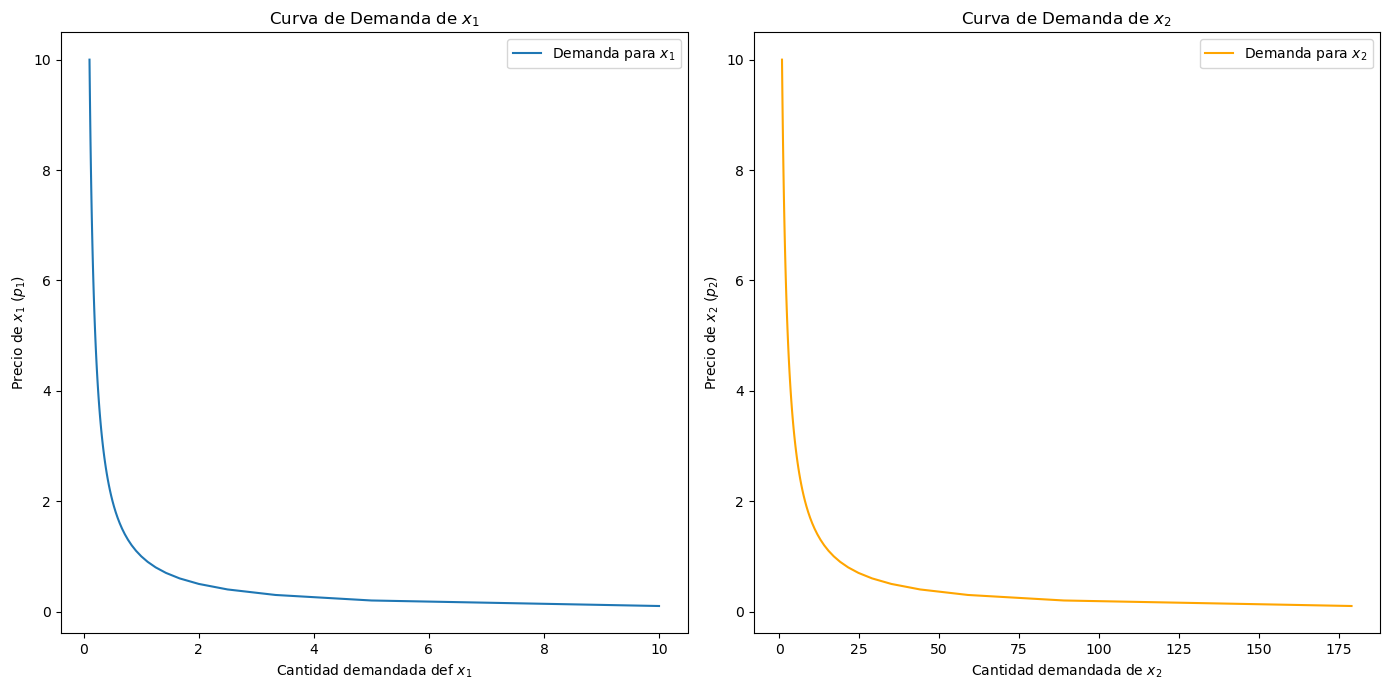

In [12]:
# Correcting the axes: Price should be on the vertical axis and quantity on the horizontal axis.

# For x1, we now keep p2 and y constant and vary p1 to get the demand curve.
# The demand function for x1 as derived before is x1 = p2 / p1. 

# For x2, we should vary p2 to get the demand curve, keeping y constant.
# The demand function for x2 as derived before is x2 = (y - p2) / p2.

# Now we create a range of prices for both p1 and p2 to generate the demand curves.
price_range = np.linspace(0.1, 10, 100)  # Avoid division by zero by starting from 0.1

# Calculate the demand for x1 and x2 based on the new price ranges.
demand_x1_corrected = p2 / price_range
demand_x2_corrected = (y - price_range) / price_range

# Plotting the corrected demand curves
plt.figure(figsize=(14, 7))

# Demand curve for x1
plt.subplot(1, 2, 1)
plt.plot(demand_x1_corrected, price_range, label='Demanda para $x_1$')
plt.ylabel('Precio de $x_1$ ($p_1$)')
plt.xlabel('Cantidad demandada def $x_1$')
plt.title('Curva de Demanda de $x_1$')
plt.legend()

# Demand curve for x2
plt.subplot(1, 2, 2)
plt.plot(demand_x2_corrected, price_range, label='Demanda para $x_2$', color='orange')
plt.ylabel('Precio de $x_2$ ($p_2$)')
plt.xlabel('Cantidad demandada de $x_2$')
plt.title('Curva de Demanda de $x_2$')
plt.legend()

plt.tight_layout()
plt.show()

## Ejercicio 1.

Evalúe el efecto sobre el excedente del consumidor de incrementar el precio de $p_1$ de 1 a 2.25, calcula la variación del excedente del consumidor resultante. Haz el cálculo analíticamente y luego en un grafico

In [13]:
from sympy import symbols, integrate

# Define the symbol for x1
x1 = symbols('x1')

# Calculate the demanded quantities for the two prices
q0 = 1 / 1  # When p1 = 1
q1 = 1 / 2.25  # When p1 = 2.25

# Define the inverse demand function for x1
inverse_demand_x1 = 1 / x1

# Calculate the change in consumer surplus
ΔEC = integrate(inverse_demand_x1, (x1, q1, q0))
ΔEC.evalf()

0.810930216216329

In [14]:
from sympy import symbols, integrate, log

# Define the symbol for p (price)
p = symbols('p')

# Given values
p2_value = 1  # p2 is constant at 1
y_value = 18  # Income y is constant at 18
p1_initial = 1  # Initial price p1
p1_final = 2.25  # Final price p1

# Calculate the consumer surplus (CS) for initial and final prices
# The demand curve is p2 / p, so we integrate this with respect to p
CS_initial = integrate(p2_value / p, (p, p1_initial, y_value)) - p1_initial * (p2_value / p1_initial)
CS_final = integrate(p2_value / p, (p, p1_final, y_value)) - p1_final * (p2_value / p1_final)

# Calculate the change in consumer surplus
ΔCS = CS_initial - CS_final
CS_initial, CS_final, ΔCS.evalf()

(-1.0 + log(18), -1.81093021621633 + log(18), 0.810930216216329)

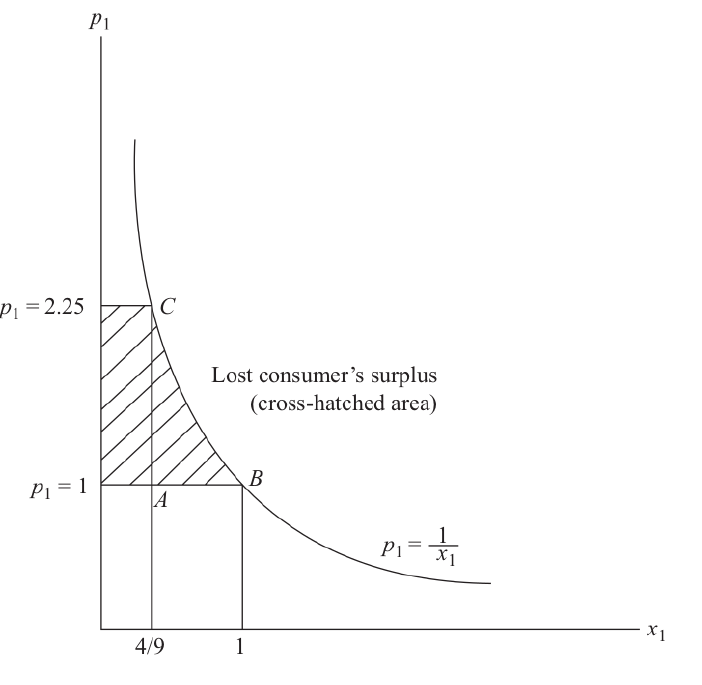

Supongamos que el precio está establecido en el precio de equilibrio, de tal manera que la cantidad demandada es igual a la cantidad ofrecida. Ahora piensa en las personas que están representadas a la izquierda del punto de equilibrio. Los consumidores de la izquierda habrían estado dispuestos a pagar un precio más alto del que terminaron pagando, por lo que el precio de equilibrio les ahorró dinero. Por otro lado, los productores representados a la izquierda habrían estado dispuestos a suministrar estos bienes por un precio más bajo -- ellos ganaron más dinero del que esperaban. ¡Ambos grupos terminaron con dinero extra en sus bolsillos!

Gráficamente, la cantidad de dinero extra que terminó en los bolsillos de los consumidores es el área entre la curva de demanda y la línea horizontal en $ p^* $. Esta es la diferencia de precio, sumada sobre todos los consumidores que gastaron menos de lo que esperaban -- una integral definida. Nota que ya que el área bajo la línea horizontal es un rectángulo, podemos simplificar la integral de área:
$$
\int_{0}^{q^*} (d(q) - p^*) dq = \int_{0}^{q^*} d(q) dq - \int_{0}^{q^*} p^* dq = \int_{0}^{q^*} d(q) dq - p^* q^*.
$$

La cantidad de dinero extra que terminó en los bolsillos de los productores es el área entre la curva de oferta y la línea horizontal en $ p^* $. Esta es la diferencia de precio, sumada sobre todos los productores que recibieron más de lo que esperaban. Similar al excedente del consumidor, esta integral se puede simplificar:
$$
\int_{0}^{q^*} (p^* - s(q)) dq = \int_{0}^{q^*} p^* dq - \int_{0}^{q^*} s(q) dq = p^* q^* - \int_{0}^{q^*} s(q) dq.
$$

## Ejercicio 1.

Evalúe el efecto sobre el excedente del consumidor de incrementar el precio de $p_1$ de 1 a 3.25, calcula la variación del excedente del consumidor resultante. Haz el cálculo analíticamente y luego en un grafico